## Ditribución Uniforme

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)
data.shape

(1000000,)

In [3]:
%matplotlib inline

(array([100284.,  99979.,  99611., 100055.,  99834., 100210.,  99717.,
        100478.,  99653., 100179.]),
 array([ 1.00000958, 10.90000462, 20.79999967, 30.69999471, 40.59998976,
        50.4999848 , 60.39997985, 70.29997489, 80.19996994, 90.09996498,
        99.99996003]),
 <a list of 10 Patch objects>)

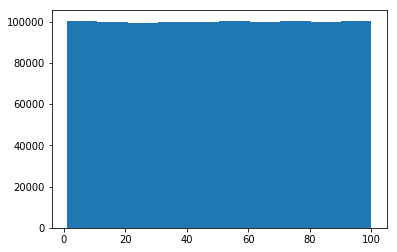

In [4]:
plt.hist(data)

## Ditribucion Normal (Campana de Gaus)

In [5]:
normal = np.random.randn(1000000)

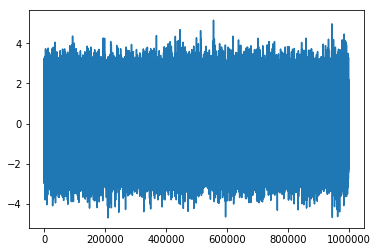

In [6]:
x = range(1,1000001)
plt.plot(x,normal)

(array([2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 5.0000e+00, 8.0000e+00,
        9.0000e+00, 1.2000e+01, 1.3000e+01, 1.9000e+01, 1.8000e+01,
        1.5000e+01, 2.7000e+01, 3.6000e+01, 3.1000e+01, 3.5000e+01,
        5.3000e+01, 5.3000e+01, 8.5000e+01, 7.6000e+01, 1.1200e+02,
        1.3500e+02, 1.4700e+02, 1.5200e+02, 2.0900e+02, 2.1500e+02,
        2.4100e+02, 3.0100e+02, 3.2700e+02, 3.7700e+02, 4.5600e+02,
        4.9700e+02, 6.0100e+02, 6.3300e+02, 7.7200e+02, 8.9200e+02,
        9.6900e+02, 1.0850e+03, 1.2590e+03, 1.3600e+03, 1.5120e+03,
        1.6980e+03, 1.8760e+03, 2.0890e+03, 2.3150e+03, 2.5990e+03,
        2.8740e+03, 3.0840e+03, 3.4450e+03, 3.7800e+03, 4.1250e+03,
        4.4660e+03, 4.8670e+03, 5.1620e+03, 5.6860e+03, 6.1890e+03,
        6.6480e+03, 7.2000e+03, 7.6200e+03, 8.2770e+03, 8.6260e+03,
        9.1530e+03, 9.7920e+03, 1.0339e+04, 1.10

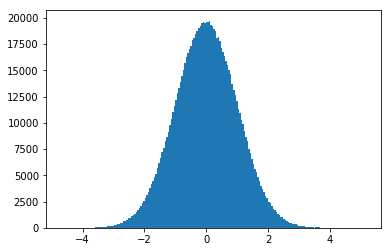

In [7]:
plt.hist(normal,bins=200)

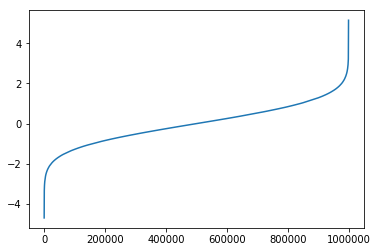

In [8]:
plt.plot(x,sorted(normal))

(array([  1.,   0.,   2.,   7.,   9.,   8.,   8.,  21.,  24.,  47.,  64.,
         80., 100., 137., 161., 223., 250., 317., 359., 422., 432., 498.,
        517., 502., 548., 532., 585., 568., 511., 489., 448., 358., 367.,
        295., 240., 209., 140., 125., 106.,  83.,  55.,  50.,  36.,  22.,
         17.,  11.,   6.,   4.,   2.,   4.]),
 array([-3.60556643, -3.24898166, -2.89239689, -2.53581212, -2.17922734,
        -1.82264257, -1.4660578 , -1.10947302, -0.75288825, -0.39630348,
        -0.0397187 ,  0.31686607,  0.67345084,  1.03003562,  1.38662039,
         1.74320516,  2.09978993,  2.45637471,  2.81295948,  3.16954425,
         3.52612903,  3.8827138 ,  4.23929857,  4.59588335,  4.95246812,
         5.30905289,  5.66563767,  6.02222244,  6.37880721,  6.73539198,
         7.09197676,  7.44856153,  7.8051463 ,  8.16173108,  8.51831585,
         8.87490062,  9.2314854 ,  9.58807017,  9.94465494, 10.30123972,
        10.65782449, 11.01440926, 11.37099403, 11.72757881, 12.08416358,
 

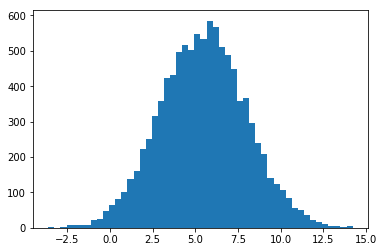

In [9]:
mu = 5.5 # media
sd = 2.5 # stadar desviation
z_10000 = np.random.randn(10000)  
#(Teorema central del limite)
#(Tipificar Convertir cualquier variable aleatoria que se precie en una normal estandar)
# z = (X - mu) / sd  => N(0,1) X = mu + sd * z

data = mu + sd * z_10000
plt.hist(data,bins = 50)

### Crear Datasets Aleatorios

In [10]:
data = np.random.randn(2,4) 
data

array([[ 0.79262417, -0.72373991,  2.0350309 , -0.53644243],
       [-2.02227644,  0.02375259, -1.56218031,  0.71375048]])

## La simulacionde Monte Carlo

* Generamos dos numeros aleatorio uniforme x e y entre 0 y 1 en total 100 veces
* Calculamos x * x + y * y  (La formula del circulo x^2 + y^2 = r^2)
    * Si el valoes es inferior a 1 -> estamos dentro del circulo
    * Si el valoes es superior a 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que esta dentro del circulo y lo dividimos entre en numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de π
* Repetimos el experimento un numero suficiente de veces(por ejemplo 100) para obtener diferentes(100) aproximaciones de π
* Calculamos el promedio de los 100 experimentos anterios para da un valor final de π

In [24]:
def pi_montecarlo(n_puntos,n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        #este seria 1 solo experimento
        value = 0
        x = np.random.uniform(0,1,n_puntos).tolist()
        y = np.random.uniform(0,1,n_puntos).tolist()
        for j in range(n_puntos):
            z = np.sqrt((x[j] * x[j]) + (y[j] * y[j]))
            if z <= 1 :
                value +=1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
        
    pi = pi_avg /n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.141668


(3.141668, [<matplotlib.lines.Line2D at 0x12328d0f0>])

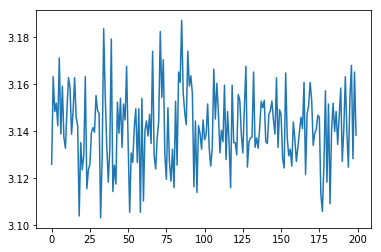

In [25]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [33]:
n=100000
data = pd.DataFrame({
    'A': np.random.randn(n),
    'B': 1.5 + 2.5 * np.random.randn(n),
    'C': np.random.uniform(5,32,n)
})

In [34]:
data.shape

(100000, 3)

In [35]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.000174,1.514388,18.508872
std,1.002061,2.492394,7.800615
min,-4.299679,-9.317219,5.000002
25%,-0.678645,-0.166325,11.743685
50%,-0.001799,1.523436,18.519739
75%,0.681060,3.197644,25.261299
max,4.190848,12.886909,31.999997


(array([   33.,   441.,  3485., 14435., 29543., 30576., 16466.,  4378.,
          604.,    39.]),
 array([-4.29967891, -3.45062623, -2.60157355, -1.75252087, -0.90346819,
        -0.05441551,  0.79463717,  1.64368985,  2.49274253,  3.34179521,
         4.19084789]),
 <a list of 10 Patch objects>)

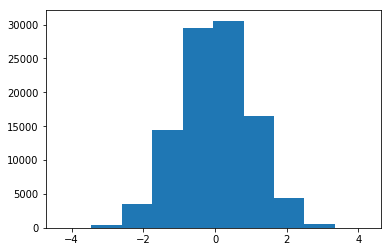

In [40]:
plt.hist(data["A"])


(array([2.6000e+01, 4.9300e+02, 4.2360e+03, 1.6912e+04, 3.2527e+04,
        3.0004e+04, 1.2941e+04, 2.5830e+03, 2.6900e+02, 9.0000e+00]),
 array([-9.3172191 , -7.09680631, -4.87639353, -2.65598074, -0.43556796,
         1.78484482,  4.00525761,  6.22567039,  8.44608318, 10.66649596,
        12.88690875]),
 <a list of 10 Patch objects>)

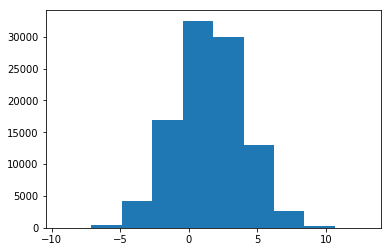

In [41]:
plt.hist(data["B"])

(array([ 9975.,  9952., 10149.,  9924.,  9912., 10015.,  9978., 10118.,
         9885., 10092.]),
 array([ 5.00000223,  7.7000017 , 10.40000118, 13.10000065, 15.80000013,
        18.4999996 , 21.19999907, 23.89999855, 26.59999802, 29.2999975 ,
        31.99999697]),
 <a list of 10 Patch objects>)

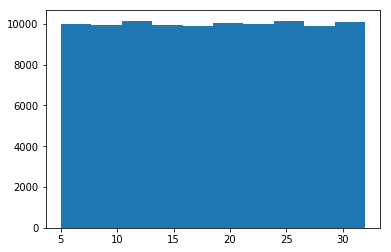

In [39]:
plt.hist(data["C"])

In [42]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [44]:
colum_names = data.columns.values.tolist()

In [46]:
a = len (colum_names)
a

21

In [50]:
n=100000
new_data = pd.DataFrame(
    {
    'Column Name': colum_names,
    'A': np.random.randn(a),
    'B': np.random.uniform(0,1,a)
    },
    index = range(42,42+a)
)

In [51]:
new_data

,Column Name,A,B
42,State,-0.388795,0.066003
43,Account Length,0.847960,0.502702
44,Area Code,-1.007590,0.452097
45,Phone,0.017551,0.700365
46,Intl Plan,-1.131271,0.275260
47,VMail Plan,-0.913953,0.375241
48,VMail Message,1.185689,0.863905
49,Day Mins,-0.688779,0.723726
50,Day Calls,-0.866917,0.522088
51,Day Charge,0.789244,0.415492
